03 Insurance App Training
===

In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib

### Introduction

Let's explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.
In any case, I wish you to be healthy!
Let's look at our data. 

In [4]:
## Load Data
data = pd.read_csv('../insurance_app/insurance_regression.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A good day is when there is no "NaN"in the data :D
Let's look at our data to understand something about it.
Since we are primarily interested in the amount of costs see what posts are more correlated with charges. For a start, we will encode categorical features.


In [6]:
# Convert strings to onehot encoding
onehot_df = pd.get_dummies(data)
onehot_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


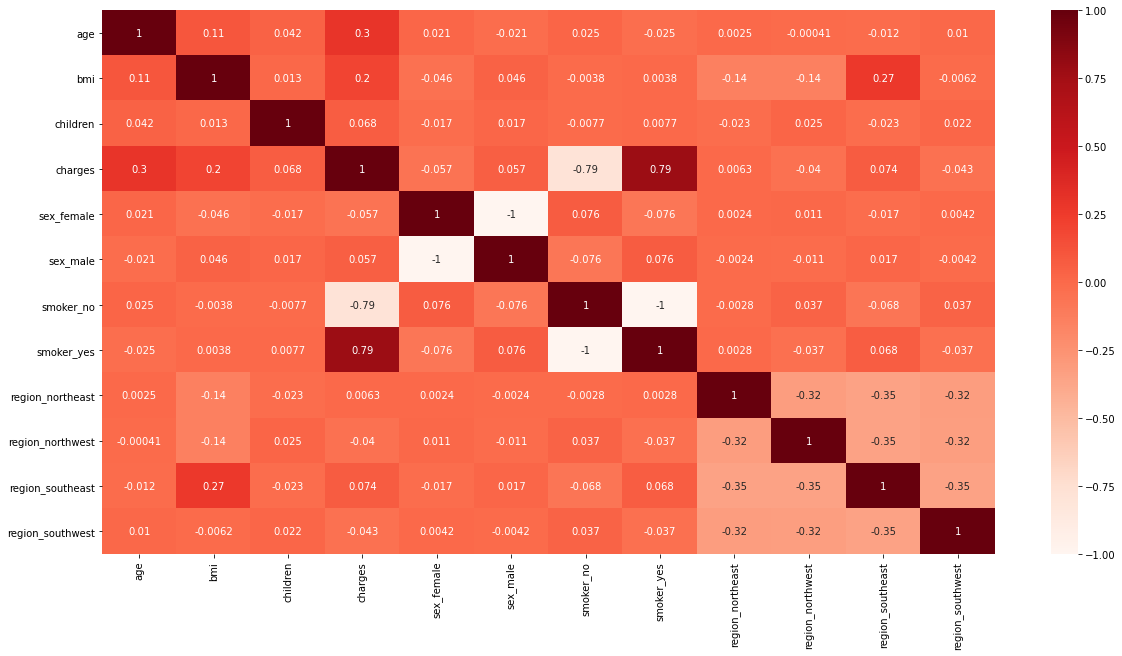

In [7]:
plt.subplots(figsize=(20,10))
sns.heatmap(onehot_df.corr(), annot=True, cmap='Reds')

- We can see that insurance charges are higher if the person is a smoker. 
- A minor side note is that, there is a weak correlation between BMI and the region_southeast.

# Smoker vs Non-Smoker

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

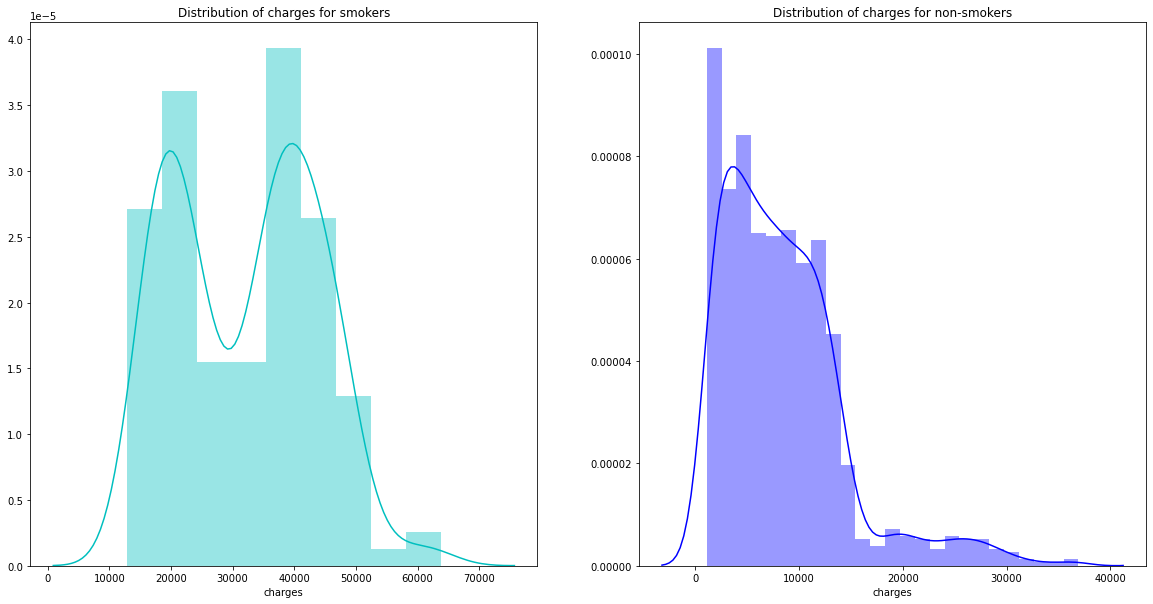

In [8]:
# Distribution of Charges split by smoker or non-smoker
f= plt.figure(figsize=(20, 10))

ax = f.add_subplot(121)
sns.distplot(data[(data.smoker=='yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(data[(data.smoker=='no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Looks like the non-smokers are getting lower premiums.

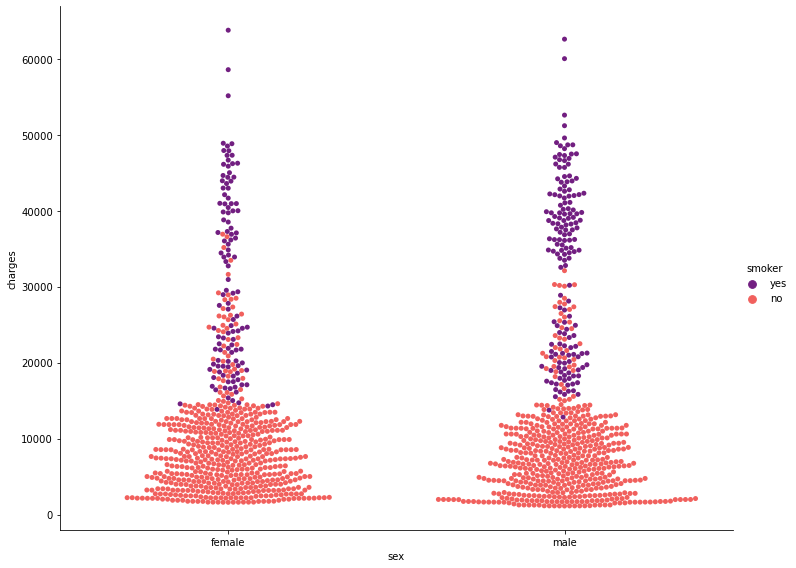

In [9]:
f = sns.catplot(x="sex", y="charges", hue="smoker",
          kind="swarm", data=data, palette = 'magma', height=8, aspect=1.3)

Split by gender,  we still see higher insurance for smokers vs non-smokers.

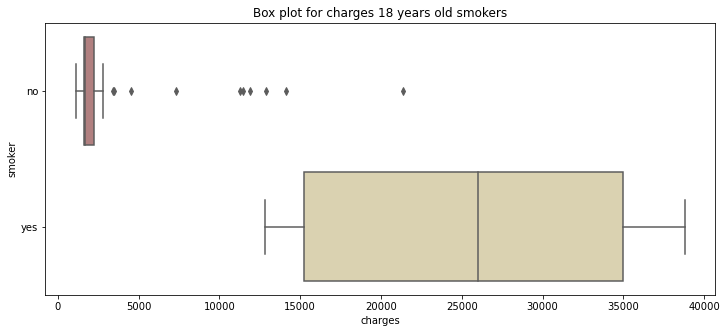

In [10]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

18 year old smokers pay around 10 times more than non-smokers.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

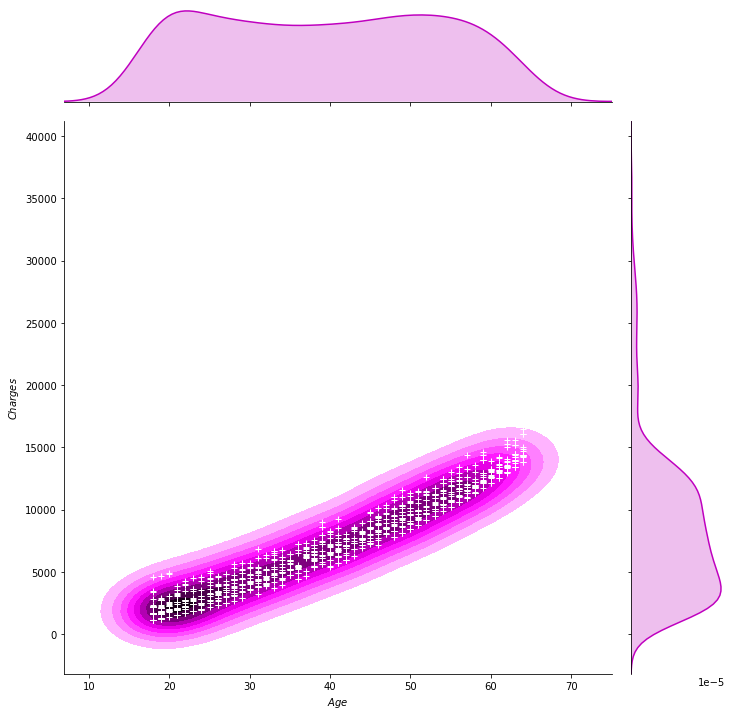

In [11]:
# Distribution of charges and age for non-smokers
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'no')],kind="kde", color="m", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for non-smokers')

For non-smokers, the cost of treatment increases as they grow old.

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

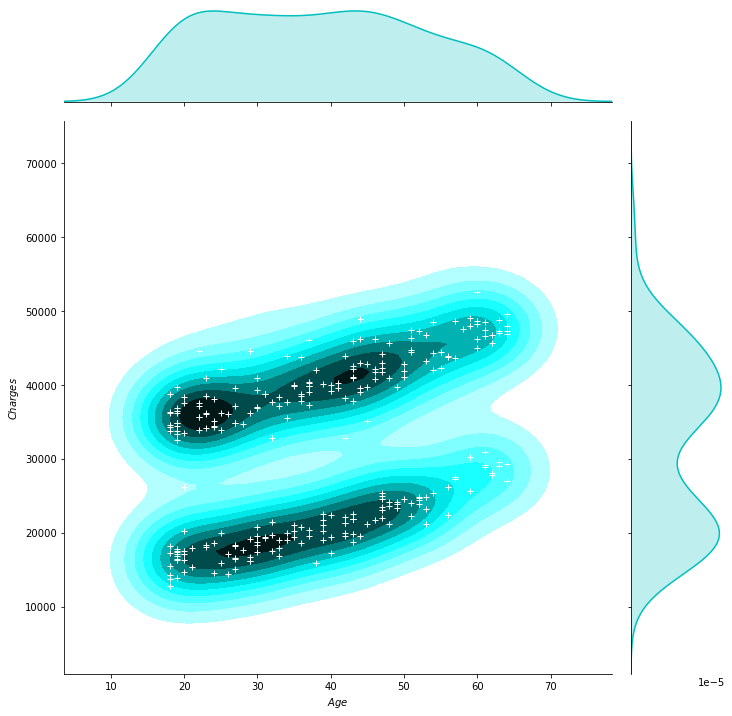

In [12]:
# Distribution of charges and age for smokers
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 'yes')],kind="kde", color="c", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for smokers')

We see the same trend for smokers but seeing that its bimodal is probably a peculiarity in the data set, seeing that being a smoker is such a strong indicatore of high insurance charge.

### How's the Diet?

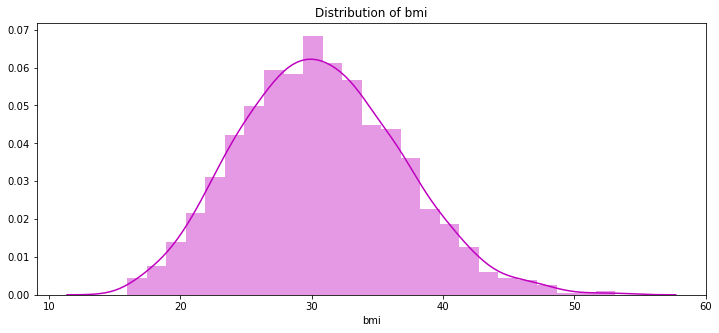

In [13]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

In [14]:
data["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Median BMI is 30, which means 50% of the patients are overweight.

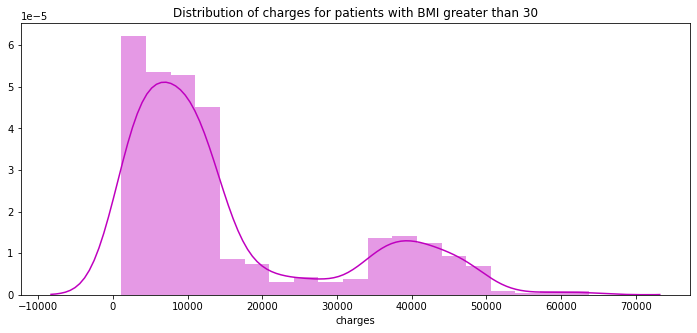

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

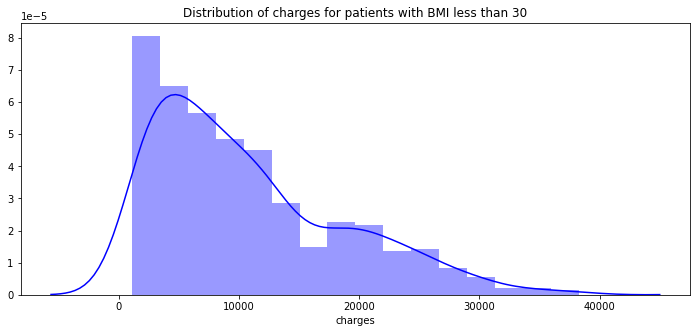

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Distribution of insurance charges for overweight vs non-overweight says that overweight people get charge a higher insurance charge.

Text(0.5, 1.0, 'Distribution of bmi and charges')

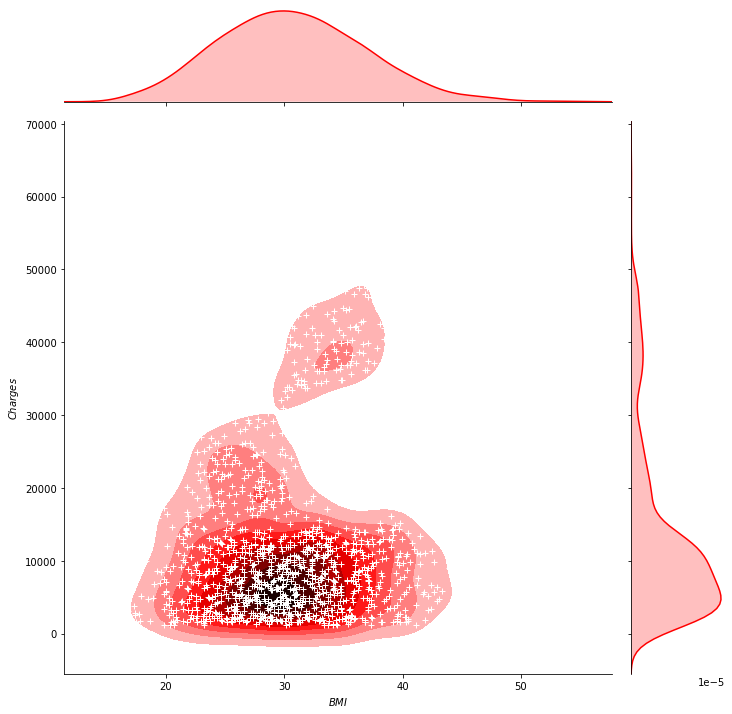

In [17]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$BMI$", "$Charges$")
ax.set_title('Distribution of bmi and charges')

### Number of Kids vs Insurance Charge

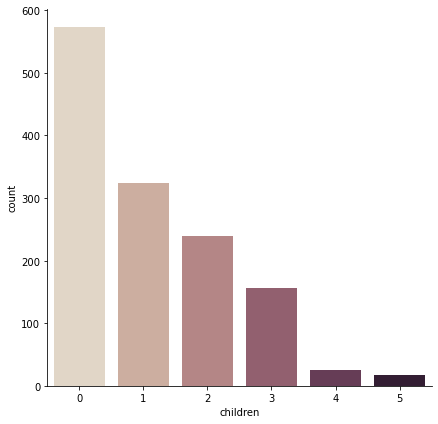

In [18]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most of these patients have no children.

### Do smokers have kids?

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

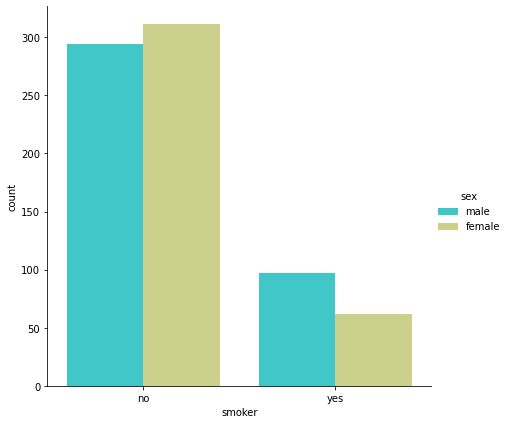

In [19]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have children')

Majority who have children are non-smokers.

# Regression

Predict insurance charges.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [21]:
x = onehot_df.drop(['charges', 'sex_male', 'smoker_no'], axis=1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)



0.7958786376014413


# Model Metrics

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error

print("r2: ", r2_score(y_test, lr.predict(x_test))) # closer to 1 is good. that means the model is able to fit
print("MAE: ", mean_absolute_error(y_test, lr.predict(x_test))) # closer to 0 is good. that means the predicted value from the actual value is not far off

r2:  0.7958786376014413
MAE:  4012.7152768530827


Simple linear regression has a score of ~80%.

In [24]:
feature_importance_df = pd.DataFrame(np.array([x.columns, lr.coef_]).T, columns=['Feature', 'Feature Importance'])
feature_importance_df

,Feature,Feature Importance
0,age,250.152
1,bmi,333.297
2,children,442.214
3,sex_female,-13.2631
4,smoker_yes,23656.6
5,region_northeast,535.345
6,region_northwest,342.212
7,region_southeast,-544.457
8,region_southwest,-333.099


In [25]:
feature_importance_df.sort_values('Feature Importance', ascending=False).Feature.values

array(['smoker_yes', 'region_northeast', 'children', 'region_northwest',
       'bmi', 'age', 'sex_female', 'region_southwest', 'region_southeast'],
      dtype=object)

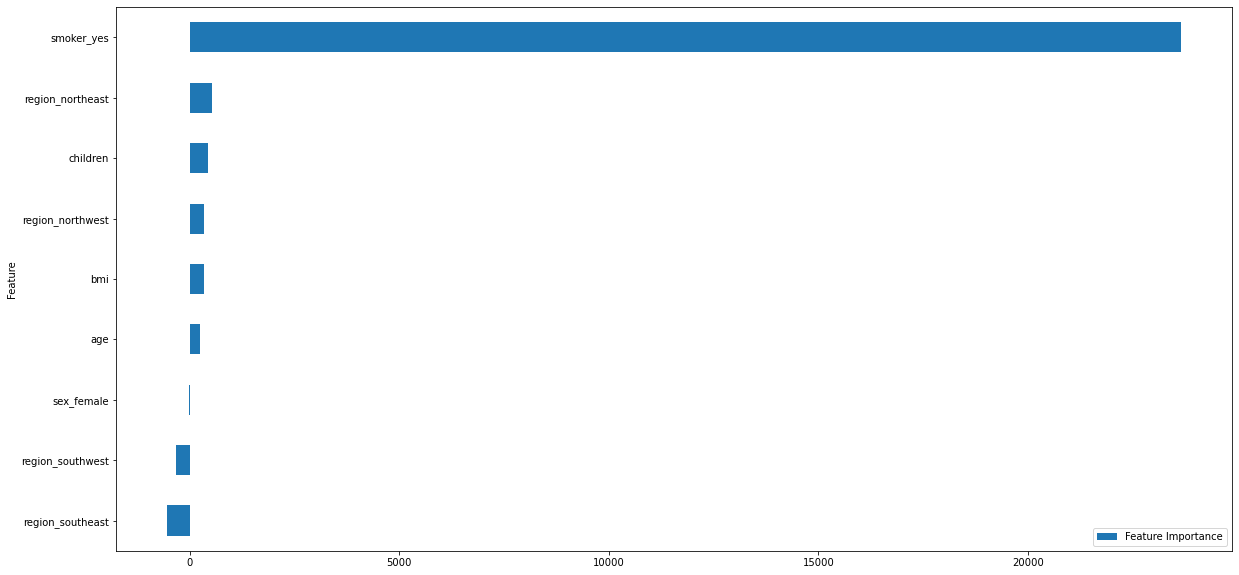

In [26]:
# Feature Importance Plot
f = feature_importance_df.sort_values('Feature Importance', ascending=False).set_index('Feature').plot(kind='barh', figsize=(20, 10))
plt.gca().invert_yaxis()
plt.show()

This shows that being a smoker is indeed indicative of higher insurance charge. So does being in northern region, number of children, bmi and age, in that order of importance.

### Saving and Loading the Model

In [27]:
# save the model to disk
filename = '../insurance_app/insurance_linearregression.mdl'
joblib.dump(lr, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.7958786376014413


In [28]:
x_test.head(1)

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,52,30.2,1,0,0,0,0,0,1


In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


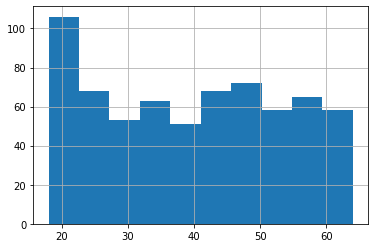

In [30]:
data[data['sex']=='female'].age.hist()

In [39]:
filters = (data['sex'] == 'female') & (data['smoker'] == 'yes') & (data['region'] == 'southwest')

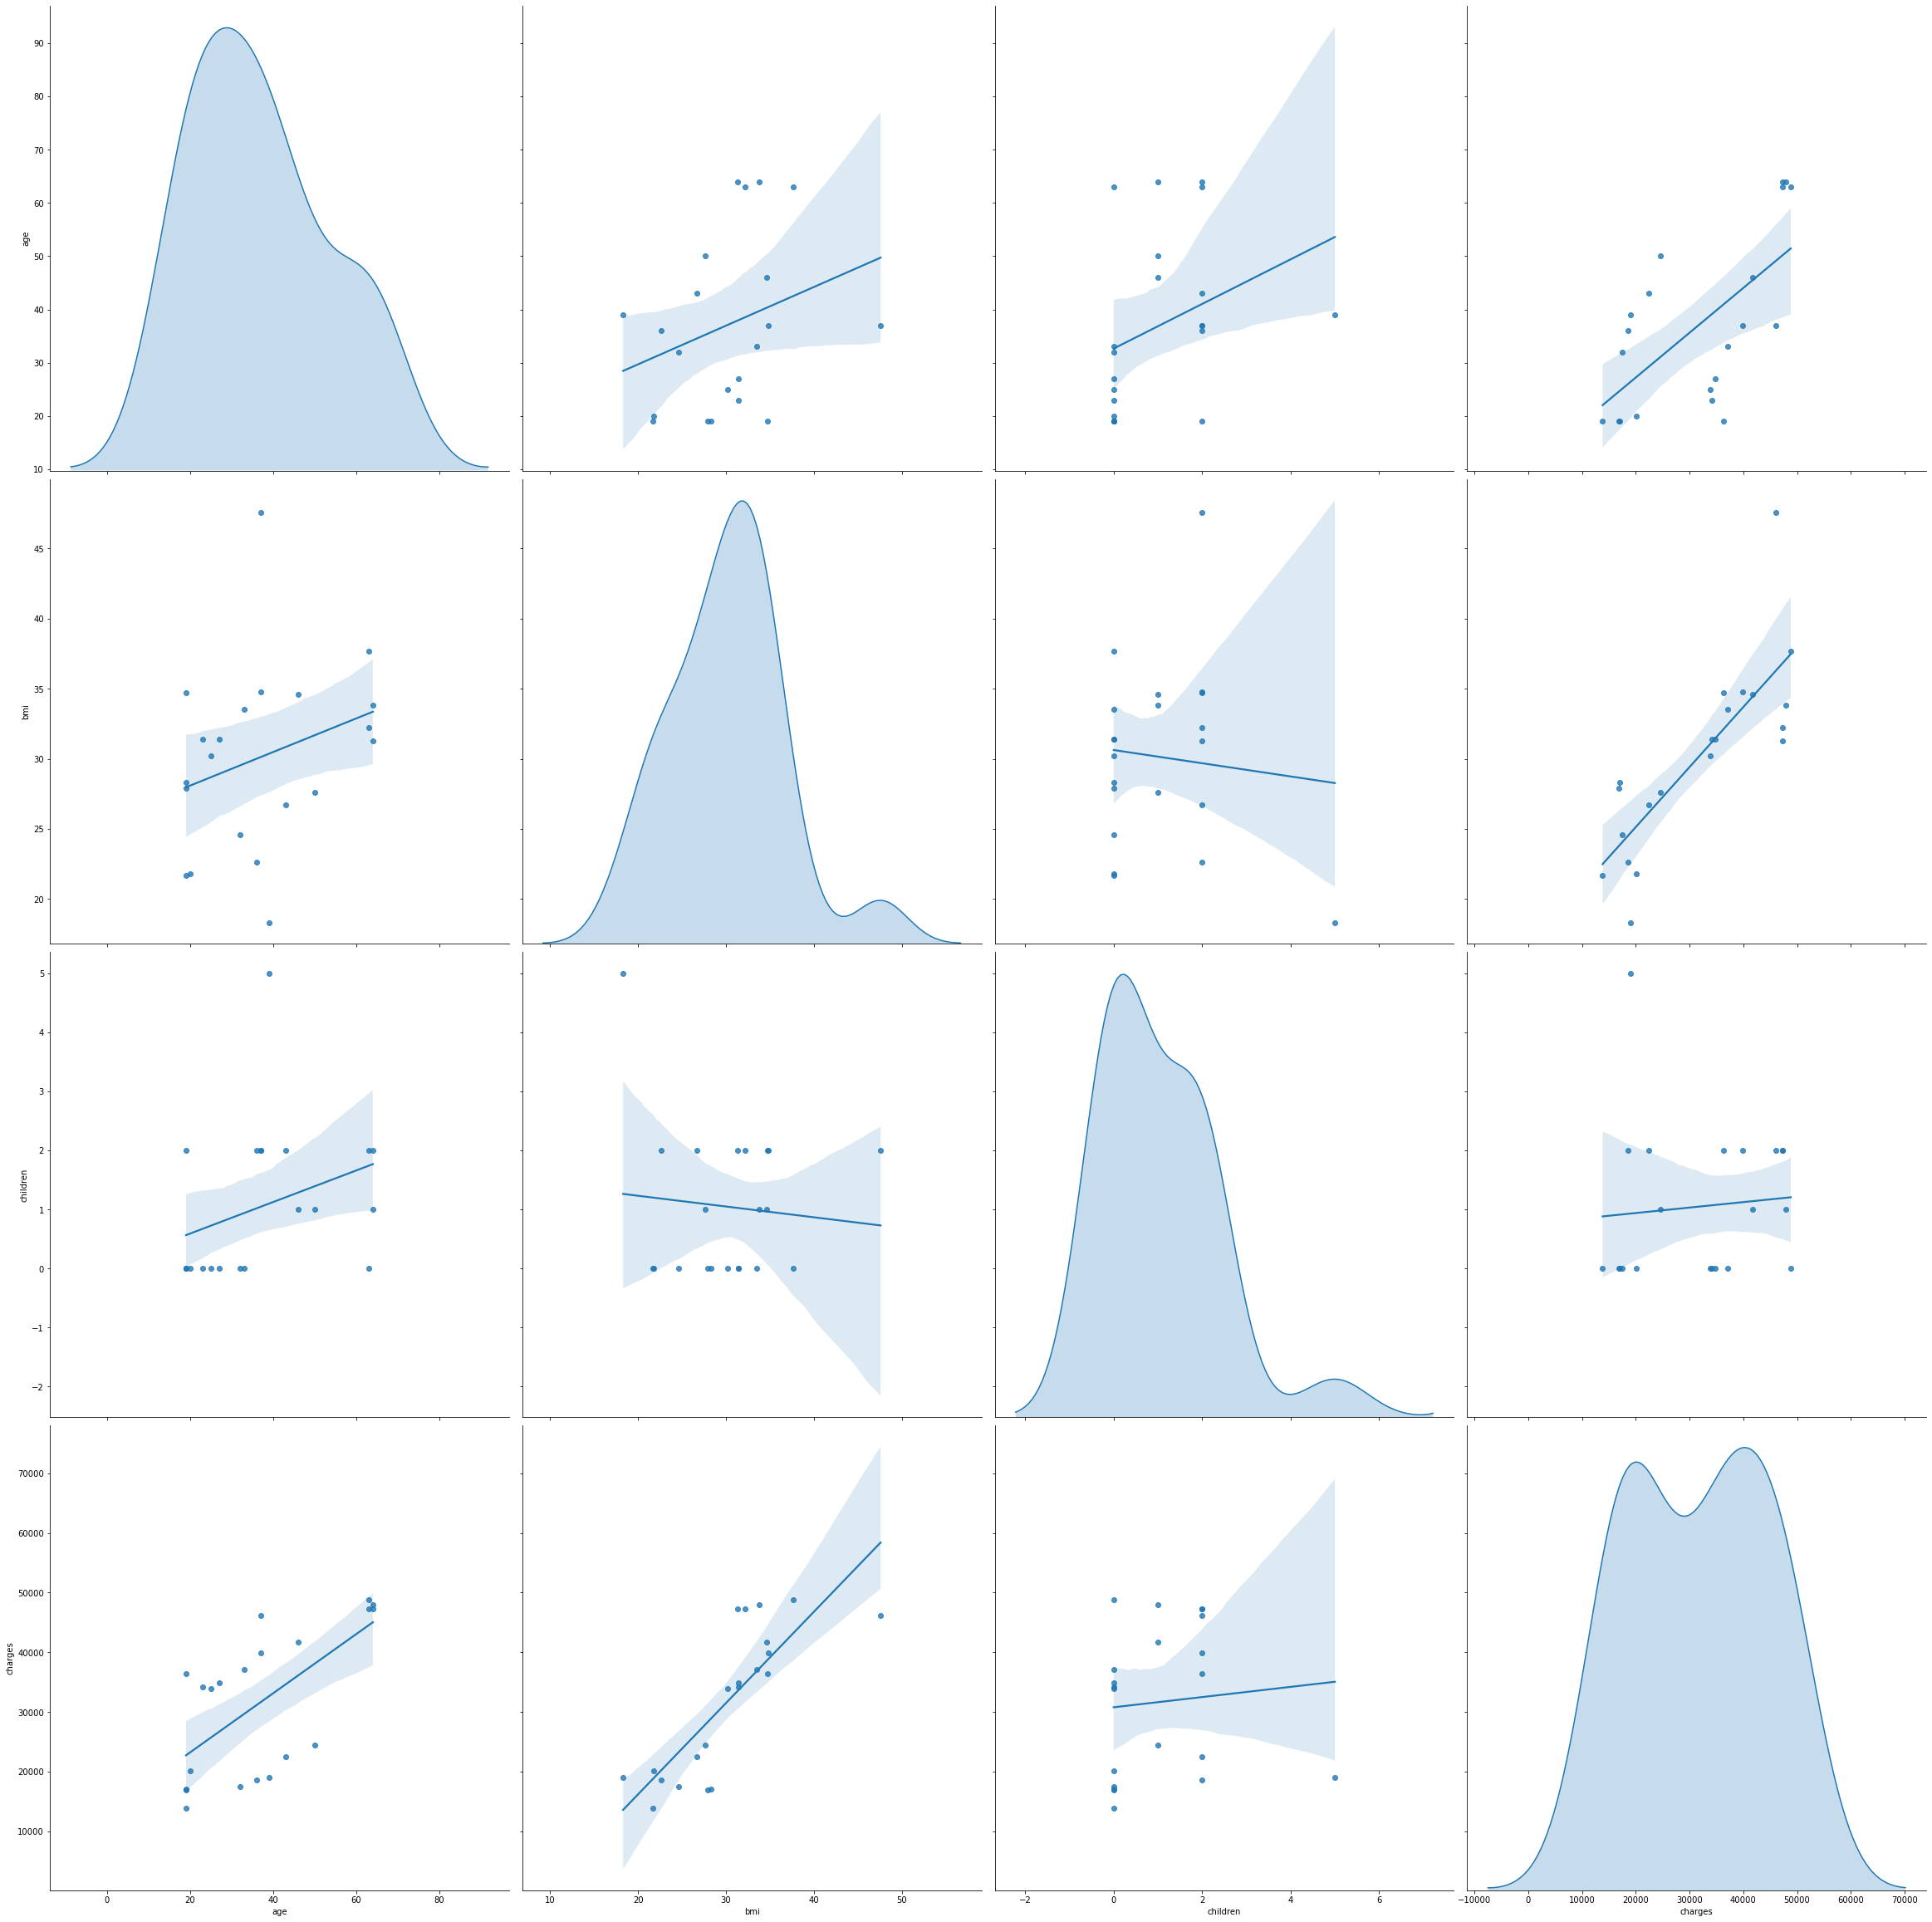

In [40]:
sns.pairplot(data[filters], height=8, kind='reg', diag_kind='kde')

### Testing Inputs of the Model

In [33]:
age = 52
bmi = 30.2
num_children = 2

gender = 'female'
if gender == 'male':
    is_female = 0
else:
    is_female = 1
    
smoker = 'yes'
if smoker == 'yes':
    is_smoker = 1
else:
    is_smoker = 0
    
region = 'northwest'
if region == 'northeast':
    loc_list = [1, 0, 0, 0]
elif region == 'northwest':
    loc_list = [0, 1, 0, 0]
elif region == 'southeast':
    loc_list = [0, 0, 1, 0]
elif region == 'southwest':
    loc_list = [0, 0, 0, 1]

### Output of the Model

In [34]:
# [Age, BMI, Number of Children, is_female, is_smoker, is_from_NorthEast, 
loaded_model.predict([[age, bmi, num_children, is_female, is_smoker] + loc_list])

array([35881.983423])

### Model Improvement

In [35]:
# Feature Engineer Data
quad = PolynomialFeatures (degree = 3)
x_quad = quad.fit_transform(x)


X_train, X_test, Y_train, Y_test = train_test_split(x_quad, y, random_state=0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test, Y_test))

0.8670760976622833


Adding polynomial features raises it to ~87%.

In [36]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(Y_train, forest_train_pred),
mean_squared_error(Y_test, forest_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(Y_train, forest_train_pred),
r2_score(Y_test, forest_test_pred)))

MSE train data: 3690138.382, MSE test data: 18340772.012
R2 train data: 0.974, R2 test data: 0.884


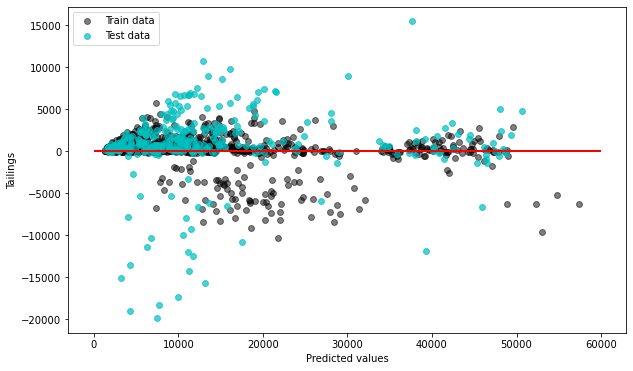

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data') 
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()